MLP Starter Code  

Winter Term Project


# **Assignment: Building a Multi-Layer Perceptron (MLP) from Scratch**

## Assignment Description
In this assignment, you will extend the provided code for a single-layer perceptron to implement a multi-layer perceptron (MLP). You will build and train models with 2, 3, and 4 layers, using the MNIST dataset. Each additional layer requires modifying forward propagation, backpropagation, and weight initialization to handle multiple layers.

## Learning Objectives
By the end of this assignment, you will:

Understand how to add intermediate layers to an MLP.
Implement forward and backward propagation for multiple layers.
Learn to handle weights, biases, and activations for multiple layers.
Train and evaluate multi-layer neural networks on the MNIST dataset.

# Assignment Steps
1. **Review the Single-Layer Perceptron Code
Carefully read and understand the provided code for a single-layer perceptron**. *Note how: Weights and biases are initialized. Forward propagation computes predictions.
Backpropagation updates weights and biases using the gradients.*

2. **Modify the Code for a 2-Layer MLP
To create a 2-layer MLP**:
Add an intermediate hidden layer.
Initialize weights and biases for both the input-to-hidden and hidden-to-output layers.
Modify forward propagation to calculate activations for the hidden layer and then pass them to the output layer.
Extend backpropagation to compute gradients for both layers and update weights accordingly.

3. **Extend the MLP to 3 and 4 Layers
Once you’ve implemented a 2-layer MLP**:
Add more layers to create 3-layer and 4-layer MLPs.
Ensure that forward propagation calculates activations for all intermediate layers sequentially.
Modify backpropagation to compute gradients for all layers using the chain rule.

#Tasks for Students
##Add an Intermediate Layer (2-Layer MLP):
  Initialize weights and biases for the hidden layer.

*   Compute activations for the hidden layer during forward propagation.
*   Update weights and biases for both layers during backpropagation.

## Extend to 3 and 4 Layers:

* Add additional layers.
* Ensure forward propagation calculates activations sequentially for all layers.
* Backpropagate errors using the chain rule for all layers.


##Plot Loss and Evaluate Accuracy:
* Plot the training loss for each model.
* Compute and display the accuracy for each model on the test set.



## Challenge Question
Add a fifth layer and then Optimize the 5-layer MLP by experimenting with different activation functions (e.g., ReLU, Tanh) or learning rates.

Analyze how these changes affect the model's performance and report your findings.

Good luck, and happy coding!

In [2]:
from keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0  # Flatten the 28x28 images to 784 features
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# One-hot encode the labels
y_train_encoded = np.zeros((y_train.size, y_train.max() + 1))
y_train_encoded[np.arange(y_train.size), y_train] = 1

y_test_encoded = np.zeros((y_test.size, y_test.max() + 1))
y_test_encoded[np.arange(y_test.size), y_test] = 1


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Helper Functions

In [3]:
# Activation function: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights and biases
def initialize_weights(input_size, output_size):
    weights = np.random.randn(input_size, output_size) * 0.1
    biases = np.zeros((1, output_size))
    return weights, biases


Implementation of SLP(Single Layer Perceptron)

In [4]:
# Forward propagation
def forward_propagation(x, weights, biases):
    z = np.dot(x, weights) + biases
    a = sigmoid(z)
    return z, a

# Backpropagation
def back_propagation(x, y, weights, biases, z, a, learning_rate):
    # Compute loss gradient w.r.t output activation
    dz = a - y
    dw = np.dot(x.T, dz) / x.shape[0]
    db = np.sum(dz, axis=0, keepdims=True) / x.shape[0]

    # Update weights and biases
    weights -= learning_rate * dw
    biases -= learning_rate * db
    return weights, biases


In [10]:
import matplotlib.pyplot as plt

def train_mlp_one_layer(x_train, y_train, epochs, learning_rate):
    input_size = x_train.shape[1]
    output_size = y_train.shape[1]

    # Initialize weights and biases
    weights, biases = initialize_weights(input_size, output_size)

    # List to store loss for plotting
    loss_history = []

    for epoch in range(epochs):
        # Forward pass
        z, a = forward_propagation(x_train, weights, biases)

        # Compute loss (Mean Squared Error)
        loss = np.mean((a - y_train) ** 2)
        loss_history.append(loss)  # Track loss

        # Backward pass
        weights, biases = back_propagation(x_train, y_train, weights, biases, z, a, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    # Plot the loss graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(epochs), loss_history, label="Loss")
    plt.title("Training Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

    return weights, biases



Test The SLP

In [11]:
def test_mlp_one_layer(x_test, y_test, weights, biases):
    _, predictions = forward_propagation(x_test, weights, biases)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_test, axis=1)
    accuracy = np.mean(predicted_labels == true_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")


Running the SLP

Epoch 0, Loss: 0.31162965016522404
Epoch 10, Loss: 0.07943104056222537
Epoch 20, Loss: 0.06498024451925312
Epoch 30, Loss: 0.05609205584600926
Epoch 40, Loss: 0.05035761912022797
Epoch 50, Loss: 0.04637090905138063
Epoch 60, Loss: 0.043423303365059514
Epoch 70, Loss: 0.04114046843064796
Epoch 80, Loss: 0.03930962888302855
Epoch 90, Loss: 0.03780140573931611


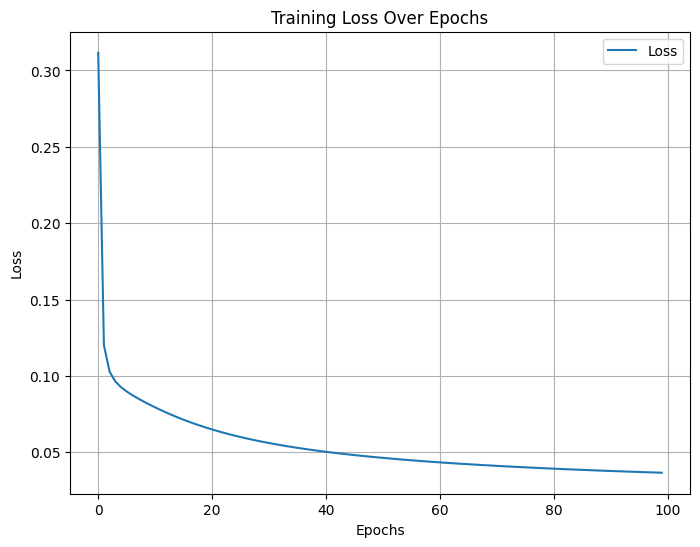

Accuracy: 84.73%


In [12]:
# Hyperparameters
epochs = 100
learning_rate = 0.1

# Train the MLP with graph
weights, biases = train_mlp_one_layer(x_train, y_train_encoded, epochs, learning_rate)

# Test the MLP
test_mlp_one_layer(x_test, y_test_encoded, weights, biases)

